1. Importação de Bibliotecas e Dados

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pathlib import Path

# Configurar estilos dos gráficos
# plt.style.use("darkgrid")
sns.set_style('darkgrid')
%matplotlib inline

# Carregar dataset salvo na fase de coleta
DATA_PATH = Path("../src/data")
ticker = "PETR4.SA"
df = pd.read_parquet(DATA_PATH / f"{ticker}_historical.parquet")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [15]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,9.656281,9.656281,9.533612,9.596519,37774500
2020-01-03,9.577648,9.826132,9.577648,9.712899,71595600
2020-01-06,9.690880,9.731770,9.420379,9.571356,81844000
2020-01-07,9.653135,9.712897,9.583937,9.694025,32822000
2020-01-08,9.593374,9.678299,9.511595,9.653136,48215600


2. Análise Descritiva
- Estatísticas básicas: utilize df.describe() para Close, Volume e demais colunas.

- Checagem de dados faltantes: df.isnull().sum().

- Range de datas: print(df.index.min(), df.index.max()).

In [19]:
print(df.describe())
print(df.isnull().sum())
print(df.index.min(), df.index.max())

             Close         High          Low         Open        Volume
count  1378.000000  1378.000000  1378.000000  1378.000000  1.378000e+03
mean     18.618523    18.857202    18.379406    18.618902  6.329509e+07
std      10.472314    10.551096    10.396557    10.473262  3.758744e+07
min       3.551121     3.831059     3.412725     3.481923  9.356900e+06
25%       9.076007     9.179829     8.932059     9.064799  3.757920e+07
50%      15.343063    15.685687    15.083383    15.257980  5.568160e+07
75%      30.158608    30.442225    29.796601    30.187822  7.841350e+07
max      36.981731    37.136618    36.544404    36.763065  4.902304e+08
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64
2020-01-02 00:00:00 2025-07-16 00:00:00


3. Visualização Temporal
- Gráfico de linha do fechamento:

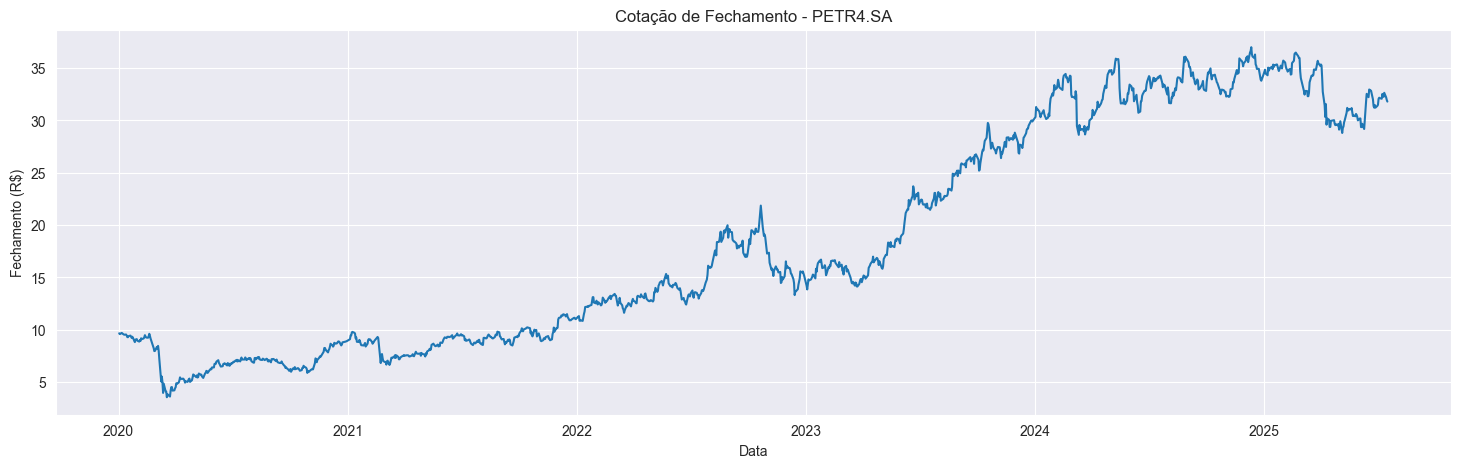

In [20]:
plt.figure(figsize=(18,5))
plt.plot(df['Close'])
plt.title(f'Cotação de Fechamento - {ticker}')
plt.xlabel('Data')
plt.ylabel('Fechamento (R$)')
plt.show()

- Boxplots mensais e semanais:

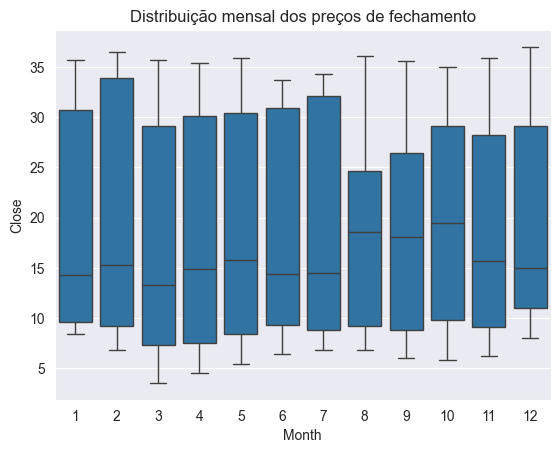

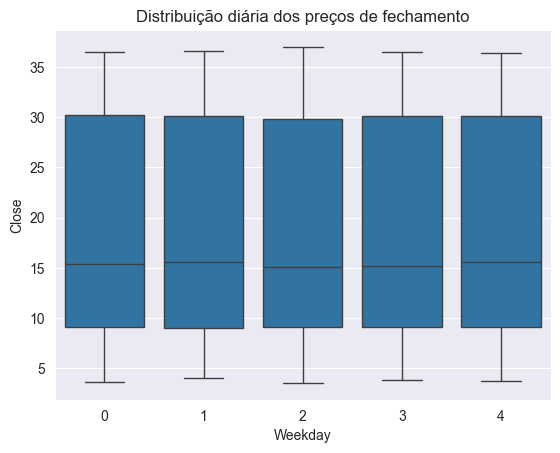

In [21]:
df['Month'] = df.index.month
sns.boxplot(x='Month', y='Close', data=df)
plt.title('Distribuição mensal dos preços de fechamento')
plt.show()

df['Weekday'] = df.index.weekday
sns.boxplot(x='Weekday', y='Close', data=df)
plt.title('Distribuição diária dos preços de fechamento')
plt.show()


4. Análise de Volatilidade e Outliers
- Desvio padrão móvel:

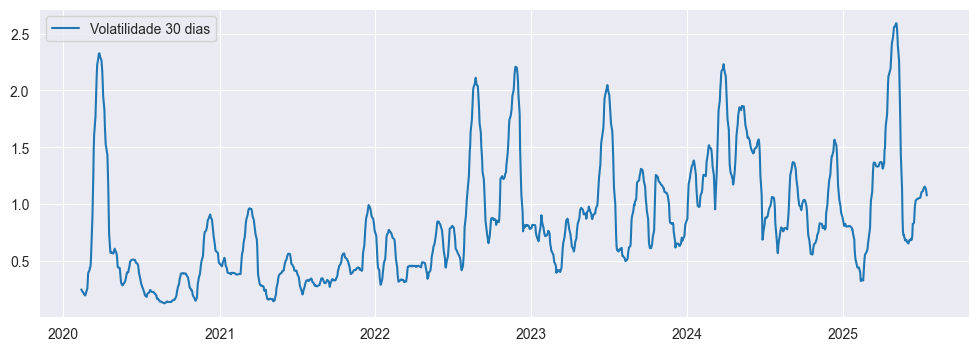

In [22]:
df['Volatility_30d'] = df['Close'].rolling(window=30).std()
plt.figure(figsize=(12,4))
plt.plot(df['Volatility_30d'], label="Volatilidade 30 dias")
plt.legend()
plt.show()

- Identificação de outliers:

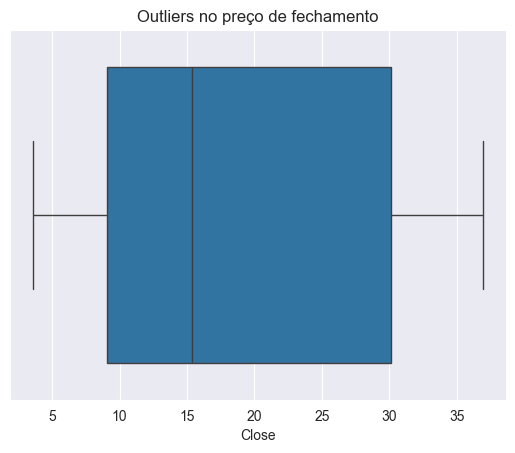

In [23]:
sns.boxplot(x=df['Close'])
plt.title('Outliers no preço de fechamento')
plt.show()

5. Decomposição da Série Temporal
- Trend, Sazonalidade e Ruído:

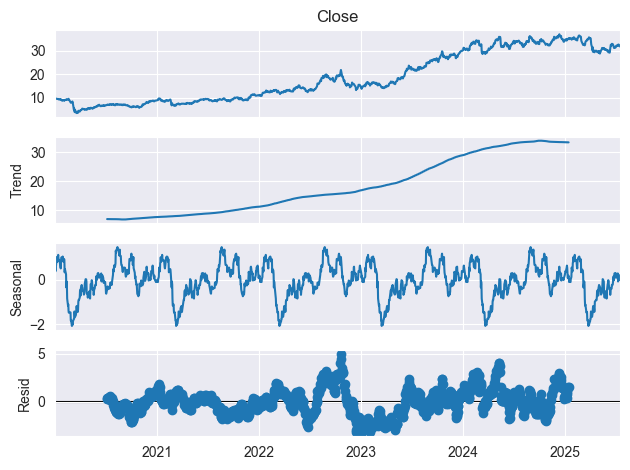

In [24]:
result = seasonal_decompose(df['Close'], model='additive', period=252) # ~dias úteis no ano
result.plot()
plt.show()

6. Testes de Estacionariedade

Conclusão: p-valor baixo (ex: < 0.05) indica estacionariedade.

- Teste ADF (Augmented Dickey-Fuller):

In [25]:
adf_result = adfuller(df['Close'].dropna())
print(f'Statistics: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

Statistics: -0.5029809833002743
p-value: 0.8914334636797518
